## Final Project Submission

Please fill out:
* Student name: Lynn Achieng Oloo
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Maryann Mwikali
* Blog post URL:



# MICROSOFT MOVIE STUDIO EDA
## Business Understanding

Microsoft sees all the big companies creating original video content and they want to get in on the fun. Microsoft decides to create a new movie studio, but doesn't know anything about creating movies. Therefore we are to explore what types of films are currently doing the best at the box office. We then  translate those findings into actionable insights that the head of Microsoft's new movie studio can use to help decide what type of films to create.
In order to answer this, we try the following objectives.

### Objectives:

1. Which genres have the highest rating?
2. What is the coorelation between production budget, domestic gross and worldwide gross?
3. What is the popularity of a movie depending on the month it was released?

So, in addition to completing the basic data cleaning tasks and the aggregation and reshaping tasks needed to answer the question above, we'll also need to give feedback or conclusion on what microsoft needs to venture in.

## Data Understanding
Note that this data may not reflect the most up-to-date box office information.
The data is contained in two separate CSV files and a sqlite database :
1. `tmdb.movies.csv` : each record represents a movie with attributes of the movie (e.g language,release date)
2. `tn.movie_budgets.csv` : each record represents a movie with the production budget, domestic gross and worldwide gross.
3. `im.db` :  SQLite database where `movie_basics` and `movie_ratings` tables are the most relevant.


## 1. Load the Data with Pandas

In the cell below, we:

* Import and alias `pandas` as `pd`
* Import  `sqlite3`
* Import and alias `numpy` as `np`
* Import and alias `seaborn` as `sns`
* Import and alias `matplotlib.pyplot` as `plt`
* Set Matplotlib visualizations to display inline in the notebook

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In the cell below, load `tmdb.movies.csv` as `movies_df`:

In [2]:
movies_df = pd.read_csv('zippedData/tmdb.movies.csv/tmdb.movies.csv')
movies_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


It looks like that CSV came with an index column, resulting in an extra column called `Unnamed: 0`. We don't need that column, so write code to get rid of it below.

There are two ways to do this:

1. Re-load with `read_csv`, and specify the parameter `index_col=0`
2. Drop the column `Unnamed: 0` with `axis=1`xis=1

In [3]:
movies_df = pd.read_csv('zippedData/tmdb.movies.csv/tmdb.movies.csv',index_col = 0)
movies_df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


Now you want to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In [4]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [5]:
movies_df.shape

(26517, 9)

Now, repeat the same process with `tn.movie_budgets.csv`. Name the dataframe `movie_budget_df`. This time, make sure you use `index_col=0` when opening the CSV because the index contains important information.

In [6]:
movie_budget_df = pd.read_csv('zippedData/tn.movie_budgets.csv/tn.movie_budgets.csv',index_col = 0)
movie_budget_df

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [7]:
movie_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [8]:
movie_budget_df.shape

(5782, 5)

* Establish a connection to the database `im.db`, called `conn`

In [9]:
conn = sqlite3.Connection("zippedData/im.db/im.db")

The basic structure of a query is:

* Write the SQL query inside of the Python string
* Use `pd.read_sql` to display the results of the query in a formatted table

For example, if we wanted to select a list of all movies in `movie_basics` and `movie_ratings` that would look like this:

In [10]:
q1 = """
SELECT *
FROM movie_basics
JOIN movie_ratings
USING (movie_id)

;
"""

imdb = pd.read_sql(q1, conn)
imdb

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...,...
73851,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
73852,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136
73853,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8
73854,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5


Now you want to get familiar with the data.  This step includes:

* Understanding the dimensionality of your dataset
* Investigating what type of data it contains, and the data types used to store it
* Discovering how missing values are encoded, and how many there are
* Getting a feel for what information it does and doesn't contain

In [11]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


## 2. Perform Data Cleaning Required to Answer First Objective

Recall that the first objective is: *Which genres have the highest rating?*

To answer this question, we will only need to use `im.db`, which contains the `genres` column and the `averagerating` column.

In [12]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


What do we want to do about these missing values?

Recall that there are two general strategies for dealing with missing values:

1. Fill in missing values (either using another value from the column, e.g. the mean or mode, or using some other value like "Unknown")
2. Drop rows with missing values
   
we see that the null values have a very low impact on our data set therefore we decide to drop the rows.
   
Now, implement the strategy to drop rows with missing values using code. 

In [13]:
imdb.dropna(subset=['genres'],inplace=True)#dropping null values in genres column

Now there should be no missing values in the genres column:

In [14]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73052 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73052 non-null  object 
 1   primary_title    73052 non-null  object 
 2   original_title   73052 non-null  object 
 3   start_year       73052 non-null  int64  
 4   runtime_minutes  65720 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73052 non-null  float64
 7   numvotes         73052 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.0+ MB


In [15]:
imdb['genres'].value_counts().head(20)# getting the value count of the unique values in genres

genres
Drama                    11612
Documentary              10313
Comedy                    5613
Horror                    2692
Comedy,Drama              2617
Thriller                  1555
Drama,Romance             1510
Comedy,Romance            1236
Comedy,Drama,Romance      1208
Horror,Thriller           1004
Drama,Thriller             990
Action                     979
Romance                    717
Biography,Documentary      694
Documentary,Drama          582
Documentary,Music          579
Comedy,Horror              579
Action,Crime,Drama         562
Crime,Drama,Thriller       504
Crime,Drama                494
Name: count, dtype: int64

At this instance we now need to group all the unique `genres` together, then get the mean of the `averagerating` corresponding to each unique genre.
We also need to sort the values in descending order to get the genres having the highest rating.

In [16]:
result = imdb.groupby('genres')#group using the genre column
genreAvgRating = result['averagerating'].mean()# get the mean of all the average ratings
sortgenreAvgRating = genreAvgRating.sort_values(ascending=False)# sort the value in descending order
sortgenreAvgRating

genres
Comedy,Documentary,Fantasy    9.4
Documentary,Family,Musical    9.3
History,Sport                 9.2
Music,Mystery                 9.0
Game-Show                     9.0
                             ... 
Crime,Music                   2.4
History,Sci-Fi,Thriller       2.3
Adventure,Crime,Romance       2.3
Adult,Horror                  2.0
Comedy,Musical,Sport          1.4
Name: averagerating, Length: 923, dtype: float64

### Answering the Question

Now we should be able to answer *Which genres have the highest rating?*

We plot a bargraph to represent our findings.

Represent the top 50 genres having the highest ratings

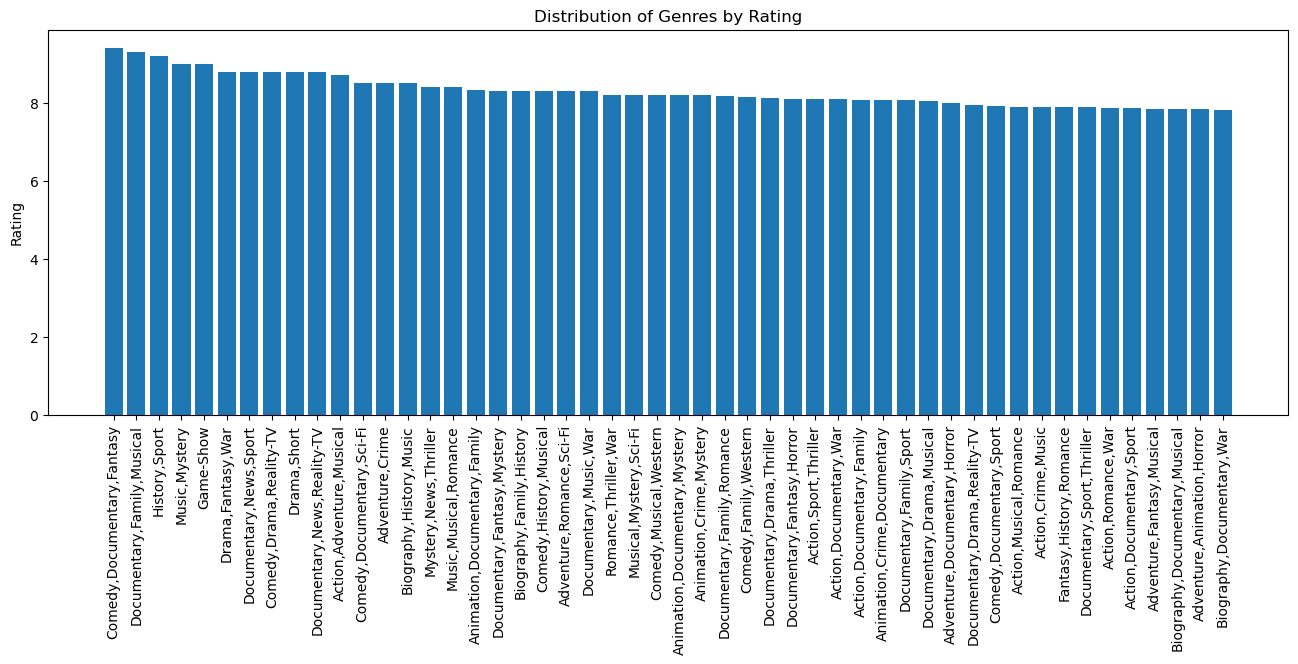

In [17]:
fig, ax1 = plt.subplots(figsize=(16, 5))

top_5_counts = sortgenreAvgRating.iloc[:50]

ax1.bar(top_5_counts.index, top_5_counts.values)
ax1.tick_params(axis="x", labelrotation=90)
ax1.set_ylabel("Rating")
ax1.set_title("Distribution of Genres by Rating");

Represent the bottom 23 genres having the lowest ratings


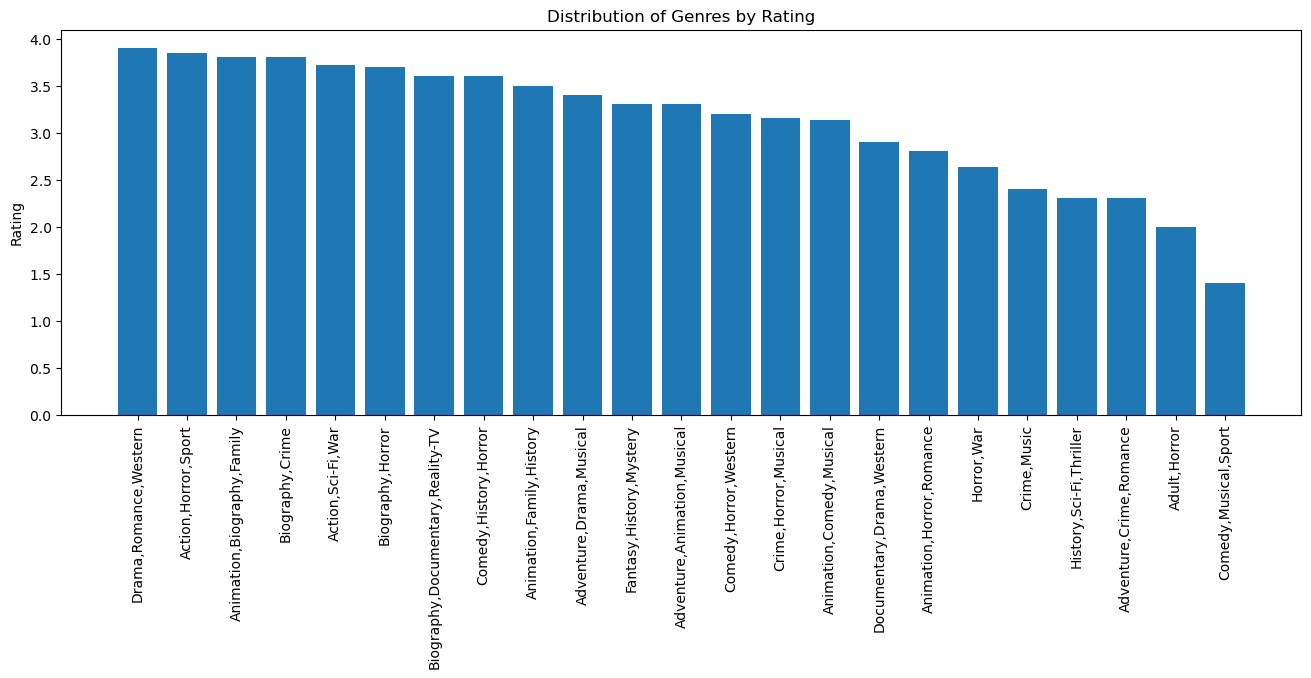

In [18]:
fig, ax1 = plt.subplots(figsize=(16, 5))

top_5_counts = sortgenreAvgRating.iloc[900:]

ax1.bar(top_5_counts.index, top_5_counts.values)
ax1.tick_params(axis="x", labelrotation=90)
ax1.set_ylabel("Rating")
ax1.set_title("Distribution of Genres by Rating");

### Conclusion

We get to see that the genre combination of Comedy, Documentary, Fantasy has the highest rating of 9.4 while the genre combination of comedy, musical, sport has the lowest rating of 1.4

## 3. Perform Data Cleaning Required to Answer Second Objective

Recall that the second objective is: *What is the coorelation between production budget, domestic gross and worldwide gross?*

To answer this question, we will only need to use `tn.movie_budgets.csv`, which contains the `production_budget` column, `domestic_gross` column and the `worldwide_gross` column.

convert `production_budget` column,`domestic_gross` column and `worldwide_gross` column into a float. Replace commas and $ signs to avoid errors

In [19]:
# convert production_budget column into a float. Replace commas and $ signs to avoid errors
movie_budget_df['production_budget'] = movie_budget_df['production_budget'].apply(lambda x: x.replace(',', '').replace('$','')).astype(float)

# convert domestic_gross column into a float. Replace commas and $ signs to avoid errors
movie_budget_df['domestic_gross'] = movie_budget_df['domestic_gross'].apply(lambda x: x.replace(',', '').replace('$','')).astype(float)

# convert worldwide_gross column into a float. Replace commas and $ signs to avoid errors
movie_budget_df['worldwide_gross'] = movie_budget_df['worldwide_gross'].apply(lambda x: x.replace(',', '').replace('$','')).astype(float)

Get the coorelation coefficient between `production_budget` and `domestic_gross` using `numpy` library

In [20]:
domestic_corr = np.corrcoef(movie_budget_df['production_budget'],movie_budget_df['domestic_gross'])
domestic_corr[0][1]

0.6856818396752724

Get the coorelation coefficient between `production_budget` and `worldwide_gross` using `numpy` library

In [21]:
world_corr = np.corrcoef(movie_budget_df['production_budget'],movie_budget_df['worldwide_gross'])
world_corr[0][1]

0.7483059765694747

### Answering the Question

Now we should be able to answer *What is the coorelation between production budget, domestic gross and worldwide gross?*

We plot a scatter plot to represent our findings.

Represent the coorelation coefficient between `production_budget` and `domestic_gross` using a scatter plot

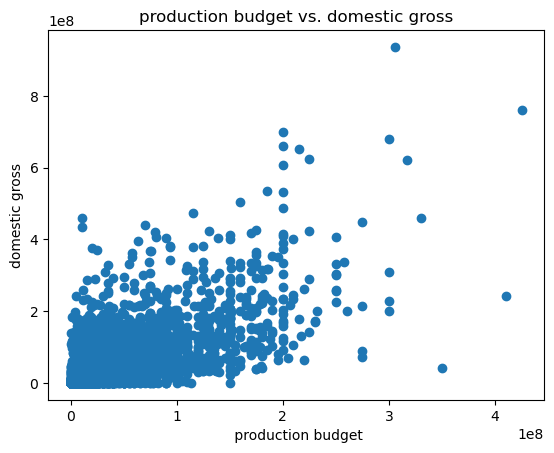

In [22]:
fig, ax = plt.subplots()

ax.scatter(movie_budget_df['production_budget'], movie_budget_df['domestic_gross'])

#ax.plot(x_bounds, y_bounds, "--", label="perfect correlation")

ax.set_title("production budget vs. domestic gross")
ax.set_xlabel(" production budget")
ax.set_ylabel("domestic gross");

Represent the coorelation coefficient between `production_budget` and `worldwide_gross` using a scatter plot

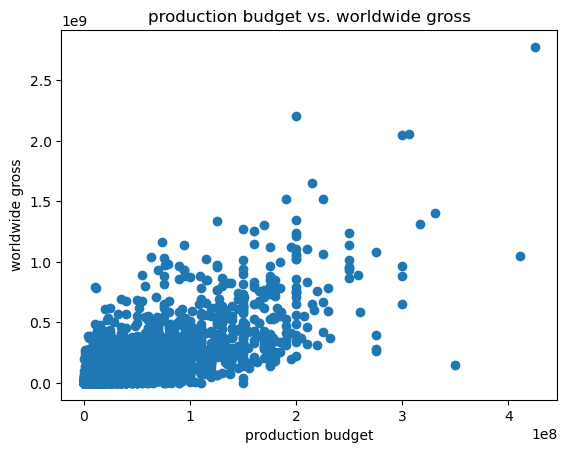

In [23]:
fig, ax = plt.subplots()

ax.scatter(movie_budget_df['production_budget'], movie_budget_df['worldwide_gross'])

#ax.plot(x_bounds, y_bounds, "--", label="perfect correlation")

ax.set_title("production budget vs. worldwide gross")
ax.set_xlabel("production budget")
ax.set_ylabel("worldwide gross");

### Conclusion

We get to see that production budget and domestic gross have a positive correlation.

we as well see this in both production budget and worldwide gross.

## 4. Perform Data Aggregation Required to Answer Second Objective

Recall that the second objective is: *What is the popularity of a movie depending on the month it was released?*

To answer this question, we will only need to use `tmdb.movies.csv`, which contains the `release_date` column, `popularity` column.

change `release_date` values into datetime objects

In [24]:
# change 'release_date' values into datetime objects
movies_df['release_date'] = pd.to_datetime(movies_df['release_date'])

Make a new `release month` column by extracting the month name from the date

In [25]:
# make a new 'release month' column by extracting the numeric month from the date
movies_df['release_month'] = movies_df['release_date'].dt.month_name()
movies_df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_month
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,November
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,March
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,May
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,November
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,July
...,...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1,October
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1,May
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1,October
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,June


At this instance we now need to group all the unique `release_month` together, then get the mean of the `popularity` corresponding to each unique month.

We also need to sort the values in ascending order to get the months having lowest rating and those having the highest rating.

In [26]:
result = movies_df.groupby('release_month')# group the data by the release month
Avgpopularity = result['popularity'].mean()#get the mean of the popularity of the movies released in a given month
sorted_Avgpopularity = Avgpopularity.sort_values(ascending=True)# sort the popularities in ascending order
sorted_Avgpopularity

release_month
January      2.180176
April        2.784293
June         3.043683
March        3.052933
October      3.081957
May          3.123663
September    3.265490
February     3.352600
November     3.459795
August       3.580677
July         3.585265
December     3.922681
Name: popularity, dtype: float64

### Answering the Question

Now we should be able to answer *What is the popularity of a movie depending on the month it was released?*

We plot a bargraph to represent our findings.

Represent the `release month` with their average popularities

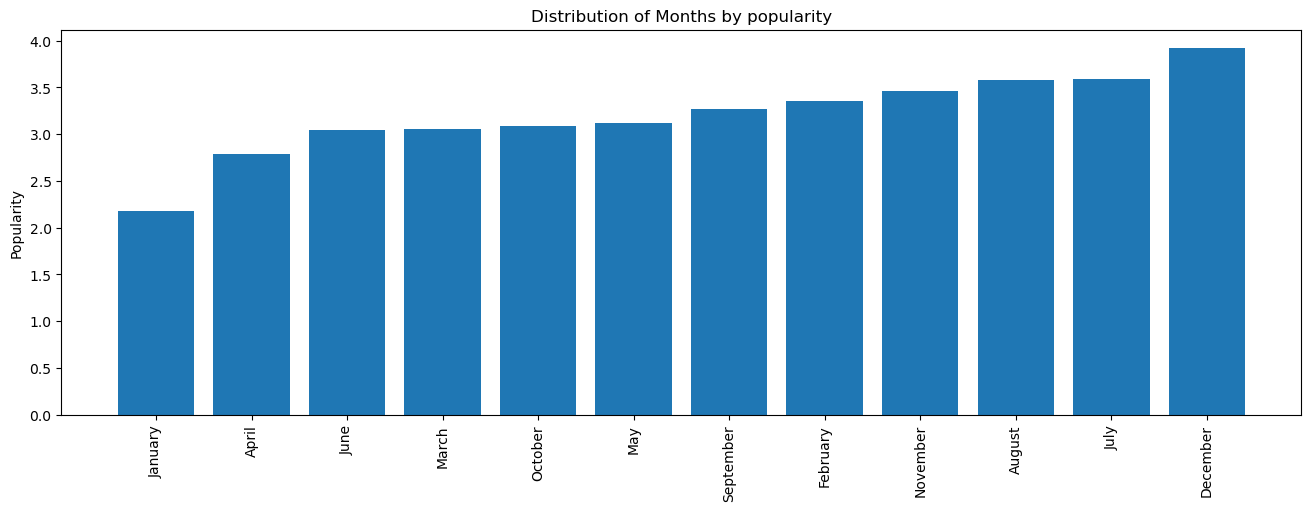

In [28]:
fig, ax1 = plt.subplots(figsize=(16, 5))

ax1.bar(sorted_Avgpopularity.index, sorted_Avgpopularity.values)
ax1.tick_params(axis="x", labelrotation=90)
ax1.set_ylabel("Popularity")
ax1.set_title("Distribution of Months by popularity");

### Conclusion

We get to see that a movie released in December has more popularity than a movie released in January or April.


## Recomendations

Based on the findings of each objective, we find the following recomendations worthwhile for microsoft organisation to look after as they look forward to venture in the movie industry.
1. venture into the genre combination of Comedy, Documentary, Fantasy has the highest rating than the rest meaning the audience highly recommend the genre combination. this is true as the analysis looked at the average rating of different movies having this combination and this was found to be the feedback.
2. We have a positive coorelation between production budget and domestic gross as well as a positive correlation between production budget and worldwide gross. This means that the higher the production budget the higher the domestic gross and the worldwide gross. Therefore,having a higher production budget will be more profitable to the organisation
3. The popularity of a movie is quite dependent on the time the movie is released. Going by this we see that when a movie is released in December the movie will be more popular than releasing the movie in the rest of the months. 
